In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [30]:
#Entrada de dados
dados = pd.read_csv('dadosacoes.csv')


In [ ]:
dados.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


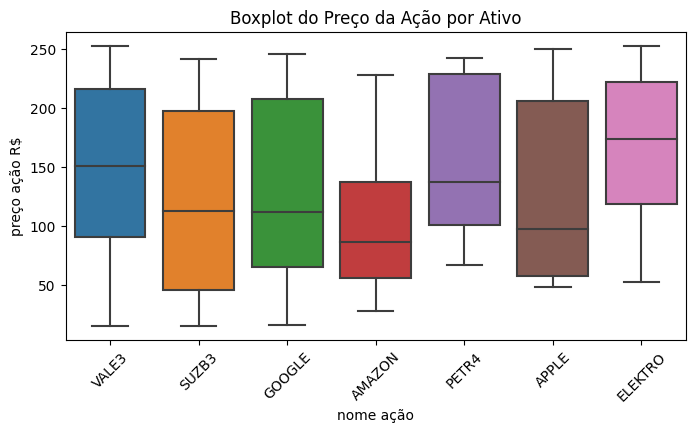

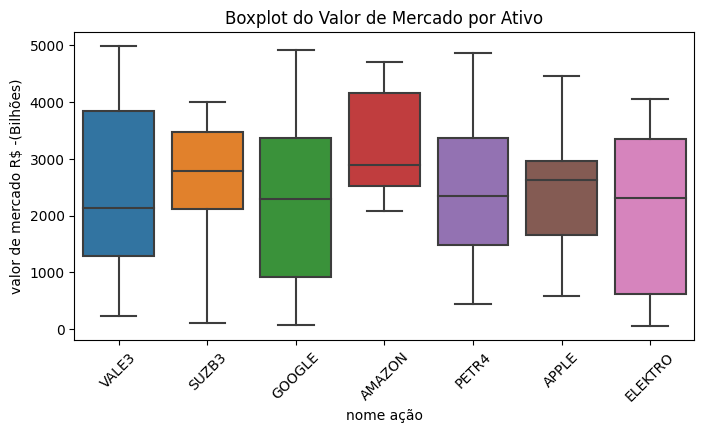

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='nome ação', y='preço ação R$', data=dados)
plt.title('Boxplot do Preço da Ação por Ativo')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=dados)
plt.title('Boxplot do Valor de Mercado por Ativo')
plt.xticks(rotation=45)
plt.show()
#São gerados dois boxplots: um para o 'preço da ação' e outro para o 'valor de mercado', ambos por ativo.




In [33]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [34]:
dados.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [35]:
dados['preço ação R$'].fillna(dados['preço ação R$'].mean(), inplace=True)
dados['qtde cotas'].fillna(dados['qtde cotas'].mean(), inplace=True)
dados['valor de mercado R$ -(Bilhões)'].fillna(dados['valor de mercado R$ -(Bilhões)'].mean(), inplace=True)

dados.isnull().sum()
# Os valores ausentes nas colunas 'preço ação R$', 'qtde cotas' e 'valor de mercado R$ -(Bilhões)' são preenchidos com a média de cada coluna, utilizando o método 'fillna'. Em seguida, é verificado se ainda existem valores ausentes com 'isnull().sum()', para garantir que o tratamento foi eficaz.

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [36]:
dados = pd.get_dummies(dados, columns=['nome ação'], drop_first=True)

dados.head()
# A coluna 'nome ação' é transformada em variáveis dummy (True/False) usando o método 'get_dummies', com a opção 'drop_first=True' para evitar a multicolinearidade. Em seguida, é exibida a primeira linha do DataFrame com 'head()' para verificar a mudança.

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False


In [37]:
dados_numericos = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_numericos)
dados_normalizados = pd.DataFrame(dados_normalizados, columns=dados_numericos.columns)

dados_normalizados.head()
# Normalizando colunas numéricas com StandardScaler e convertendo para DataFrame

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,0.772901,-0.256419,-0.215567
1,-0.602986,0.694636,0.456955
2,0.385515,-0.402735,0.274259
3,-1.070520,-0.658788,0.848240
4,1.013347,-1.573264,0.389343


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


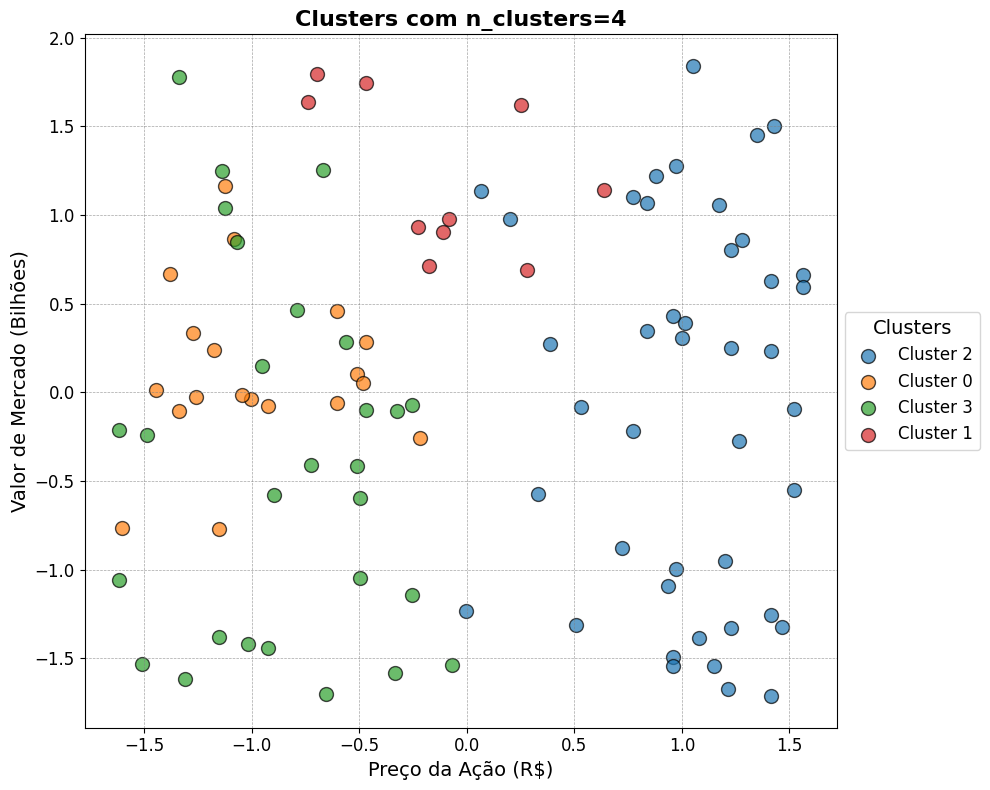

In [46]:
# Executando K-means com n_clusters=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
dados_normalizados['Cluster_4'] = kmeans_4.fit_predict(dados_normalizados)

plt.figure(figsize=(10, 8))

# Plotando os clusters com cores da paleta tab10
for i, cluster in enumerate(dados_normalizados['Cluster_4'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_4'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

# Personalização do gráfico
plt.title('Clusters com n_clusters=4', fontsize=16, fontweight='bold')
plt.xlabel('Preço da Ação (R$)', fontsize=14)
plt.ylabel('Valor de Mercado (Bilhões)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Clusters', fontsize=12, title_fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5), frameon=True)
# Adicionando uma grade para facilitar a visualização
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


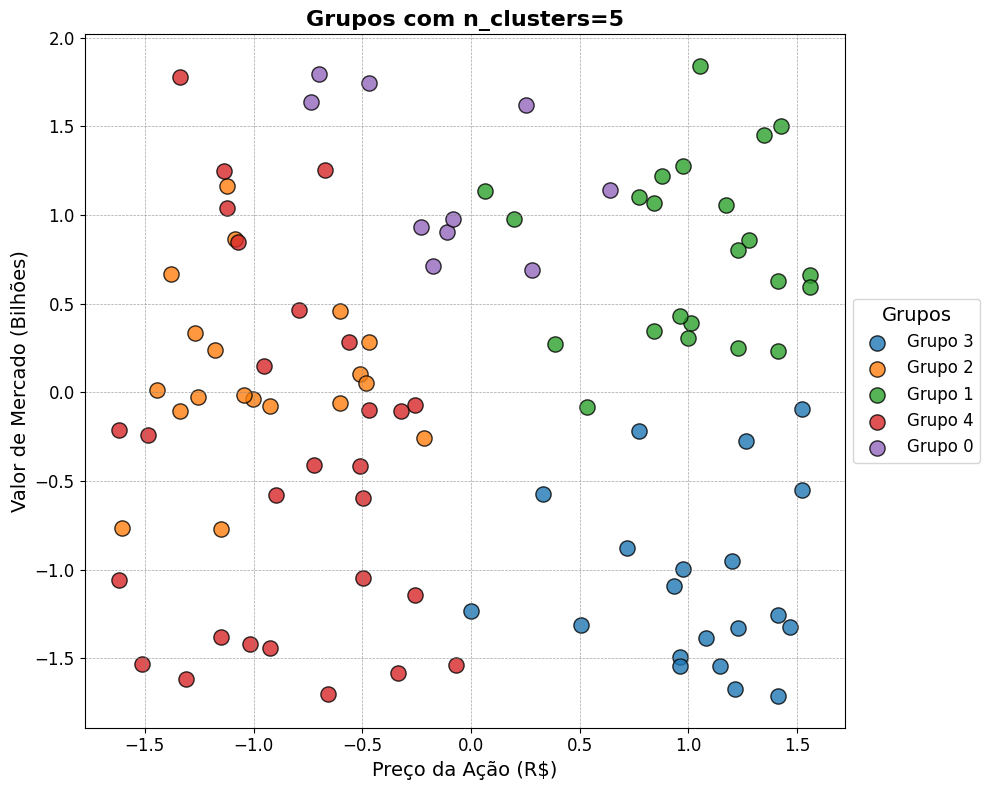

In [47]:
# Alterando para n_clusters=5 e visualizando os novos grupos formados
kmeans_5 = KMeans(n_clusters=5, random_state=42)
dados_normalizados['Cluster_5'] = kmeans_5.fit_predict(dados_normalizados)

plt.figure(figsize=(10, 8))

# Plotando os clusters com cores da paleta tab10
for i, cluster in enumerate(dados_normalizados['Cluster_5'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_5'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Grupo {cluster}', color=plt.cm.tab10(i % 10), s=120, alpha=0.8, edgecolor='black')

# Personalizando o gráfico
plt.title('Grupos com n_clusters=5', fontsize=16, fontweight='bold')
plt.xlabel('Preço da Ação (R$)', fontsize=14)
plt.ylabel('Valor de Mercado (Bilhões)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Posicionando a legenda fora do gráfico
plt.legend(title='Grupos', fontsize=12, title_fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5), frameon=True)

# Adicionando uma grade para melhor visualização
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()



c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


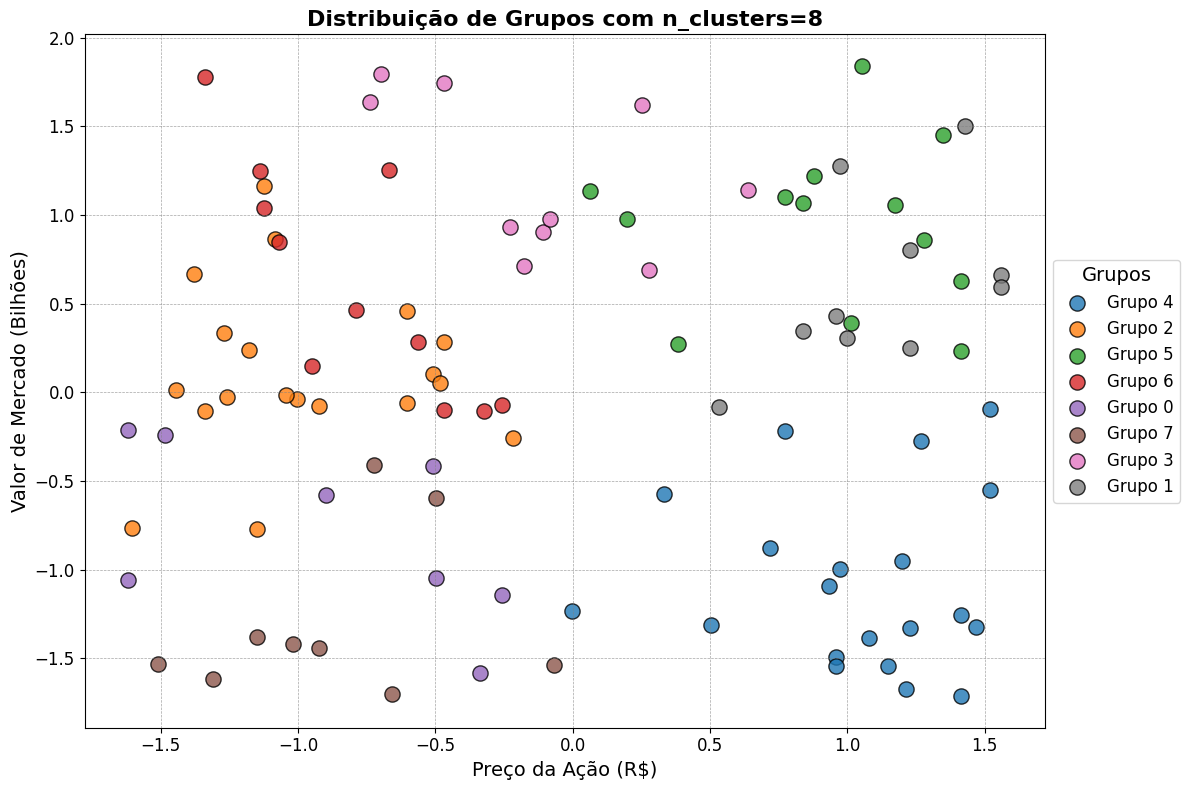

In [48]:
# Alterando para n_clusters=8 e analisando os novos grupos formados
kmeans_8 = KMeans(n_clusters=8, random_state=42)
dados_normalizados['Cluster_8'] = kmeans_8.fit_predict(dados_normalizados)

plt.figure(figsize=(12, 8))

# Plotando os clusters com cores distintas da paleta tab10
for i, cluster in enumerate(dados_normalizados['Cluster_8'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_8'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Grupo {cluster}', color=plt.cm.tab10(i % 10), s=120, alpha=0.8, edgecolor='black')

# Personalizando o gráfico
plt.title('Distribuição de Grupos com n_clusters=8', fontsize=16, fontweight='bold')
plt.xlabel('Preço da Ação (R$)', fontsize=14)
plt.ylabel('Valor de Mercado (Bilhões)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Posicionando a legenda fora do gráfico
plt.legend(title='Grupos', fontsize=12, title_fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5), frameon=True)

# Adicionando grade para facilitar a análise visual
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()



c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

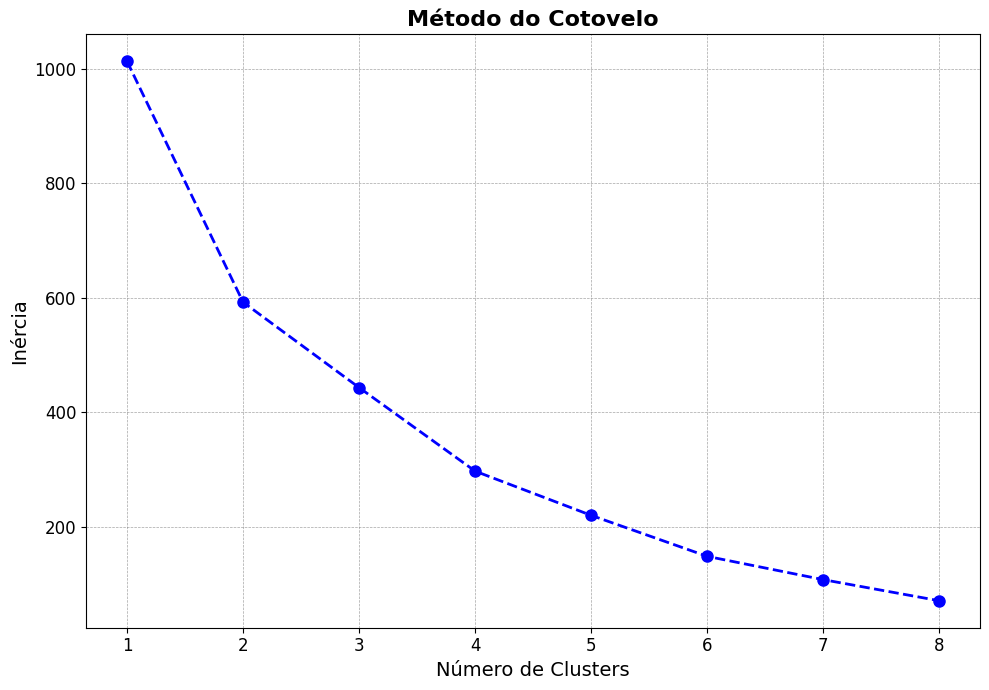

In [49]:
# Gerando o gráfico do cotovelo para identificar o número ideal de clusters
inertia = []
for n in range(1, 9):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(dados_normalizados)
    inertia.append(kmeans.inertia_)

# O gráfico do cotovelo
plt.figure(figsize=(10, 7))
plt.plot(range(1, 9), inertia, marker='o', linestyle='--', color='b', linewidth=2, markersize=8)
plt.title('Método do Cotovelo', fontsize=16, fontweight='bold')
plt.xlabel('Número de Clusters', fontsize=14)
plt.ylabel('Inércia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Adicionando grade para facilitar a análise
plt.tight_layout()
plt.show()



c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


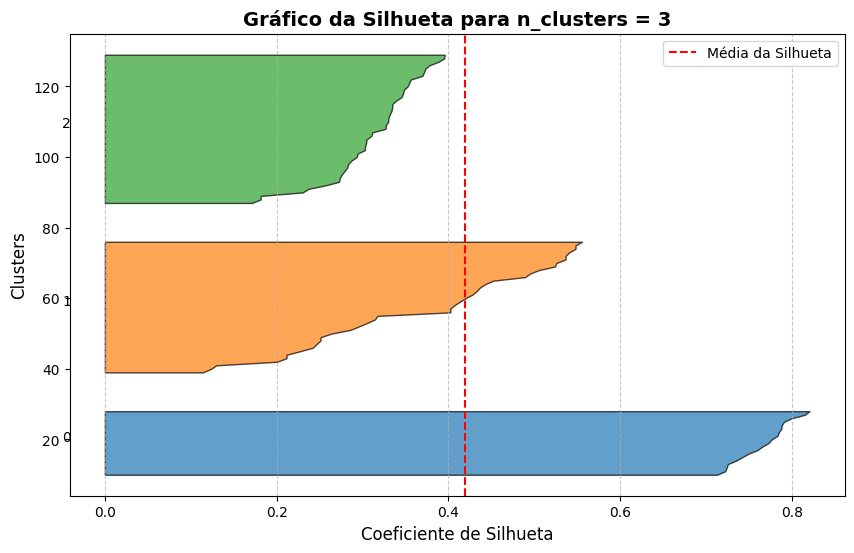

In [42]:


# Escolhendo um número de clusters para gerar o gráfico da silhueta
n_clusters = 3  # Por exemplo, usar 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(dados_normalizados)

# Calculando a pontuação da silhueta para cada ponto
silhouette_vals = silhouette_samples(dados_normalizados, cluster_labels)

# Criando o gráfico da silhueta
plt.figure(figsize=(10, 6))
y_lower = 10  # Espaço inicial
colors = cm.tab10(range(n_clusters))  # Paleta de cores

for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    size_cluster = len(cluster_silhouette_vals)
    y_upper = y_lower + size_cluster

    plt.fill_betweenx(
        range(y_lower, y_upper),
        0,
        cluster_silhouette_vals,
        color=colors[i],
        edgecolor='black',
        alpha=0.7,
    )
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10  # Espaço entre clusters

# Linha média da silhueta
silhouette_avg = silhouette_score(dados_normalizados, cluster_labels)
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Média da Silhueta")

# Personalização do gráfico
plt.title(f"Gráfico da Silhueta para n_clusters = {n_clusters}", fontsize=14, fontweight="bold")
plt.xlabel("Coeficiente de Silhueta", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

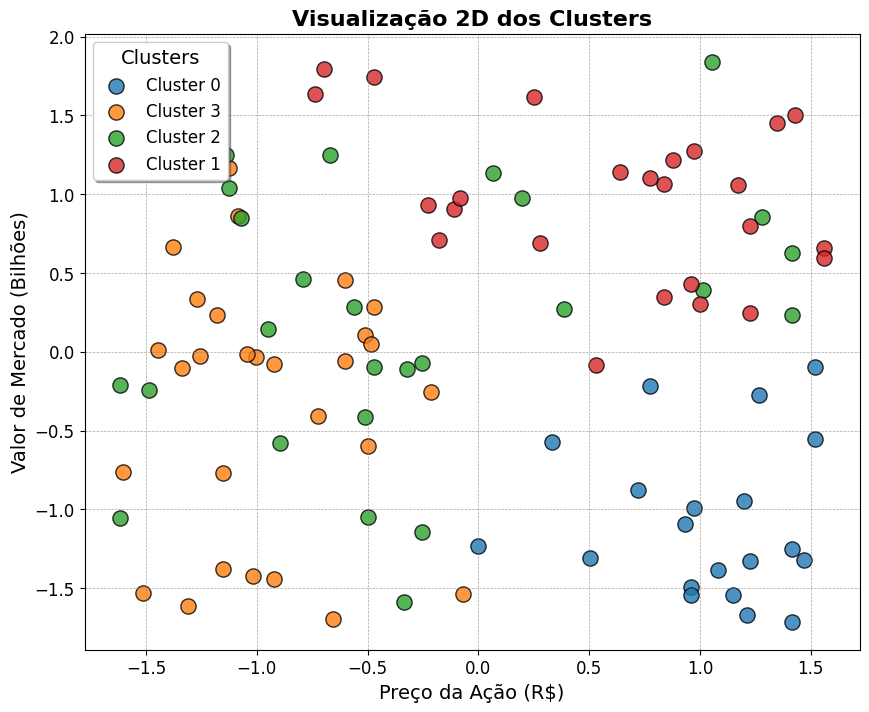

In [43]:
plt.figure(figsize=(10, 8))

# Iterando sobre os clusters e atribuindo cores a cada um
for i, cluster in enumerate(dados_normalizados['Cluster_4'].unique()):
    cluster_data = dados_normalizados[dados_normalizados['Cluster_4'] == cluster]
    
    # Usando plt.cm.tab10 para gerar uma cor para cada cluster
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=120, alpha=0.8, edgecolor='black')

# Personalização do gráfico
plt.title('Visualização 2D dos Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Preço da Ação (R$)', fontsize=14)
plt.ylabel('Valor de Mercado (Bilhões)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Melhorando a legenda
plt.legend(title='Clusters', fontsize=12, title_fontsize=14, loc='upper left', frameon=True, shadow=True)

# Adicionando grade para melhor visualização
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()


In [44]:
from sklearn.cluster import KMeans

# Selecionando as variáveis para clustering
X = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Aplicando o KMeans com n_clusters = 4 (ou 5 ou 8, conforme desejado)
kmeans = KMeans(n_clusters=4, random_state=42)
dados['Cluster_4'] = kmeans.fit_predict(X)

# Visualizando os dados com a coluna de clusters
print(dados.head())

   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  nome ação_APPLE  \
0            194          45                            2134            False   
1             91          71                            3069            False   
2            165          41                            2815            False   
3             56          34                            3613            False   
4            212           9                            2975            False   

   nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  nome ação_SUZB3  \
0              False             False            False            False   
1              False             False            False             True   
2              False             False            False             True   
3              False             False            False             True   
4              False              True            False            False   

   nome ação_VALE3  Cluster_4  
0             True      

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


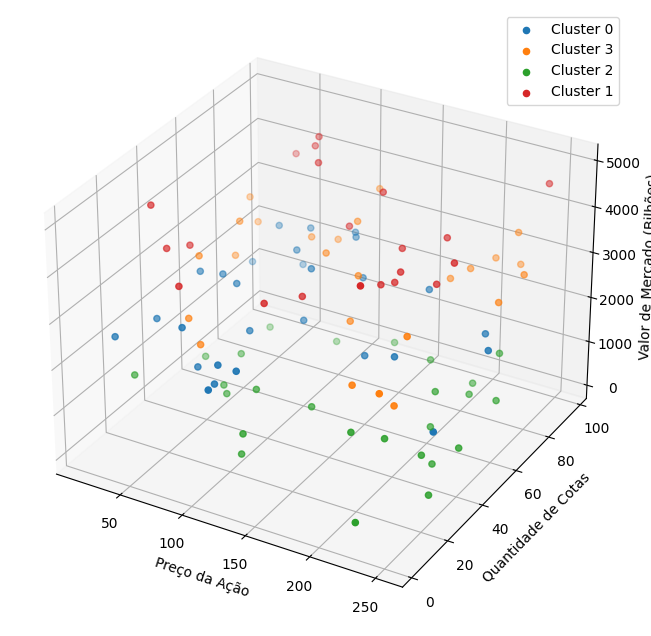

In [45]:
#b) Visualização 3d dos clusters formados
# Visualização 3D dos clusters formados
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtenha os clusters únicos
clusters = dados['Cluster_4'].unique()

# Iterar sobre os clusters e plotar com cores distintas
for i, cluster in enumerate(clusters):
    cluster_data = dados[dados['Cluster_4'] == cluster]
    # Escolher uma cor padrão para cada cluster, por exemplo, 'C0', 'C1', etc. 
    ax.scatter(cluster_data['preço ação R$'], 
               cluster_data['qtde cotas'],
               cluster_data['valor de mercado R$ -(Bilhões)'],
               label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10))  

# Adicionar títulos e rótulos aos eixos
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (Bilhões)')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

Qual a maior vantagem do aprendizado não supervisionado diante o aprendizado supervisionado ?

O principal benefício do aprendizado não orientado em relação ao supervisionado é a sua capacidade de detectar padrões e estruturas nos dados sem a exigência de rótulos ou supervisão direta. Embora o aprendizado supervisionado necessite de dados etiquetados para treinar o modelo, o aprendizado não supervisionado pode utilizar dados não etiquetados, tornando-o mais flexível em circunstâncias onde a obtenção de rótulos é dispendiosa, complexa ou inviável.
Ademais, é eficaz na identificação de padrões escondidos ou agrupamentos nos dados, como em métodos de agrupamento (clustering) e diminuição de dimensionalidade, possibilitando uma análise mais aprofundada e a descoberta de informações surpreendentes. Esta estratégia é particularmente eficaz ao lidar com grandes quantidades de dados não categorizados, como textos, imagens ou dados numéricos.